&nbsp;&nbsp;&nbsp;&nbsp;**Описание выбранного датасета**

&nbsp;&nbsp;&nbsp;&nbsp;Выбран датасет: https://www.kaggle.com/datasets/bilalwaseer/worlds-cities-with-their-average-temperature/data

&nbsp;&nbsp;&nbsp;&nbsp;Этот набор данных предоставляет информацию о средней температуре в различных городах мира за период в 12 месяцев и году.

&nbsp;&nbsp;&nbsp;&nbsp;Атрибуты в датасете:
   - City - название города (строковый тип данных)
   - Country - название страны (строковый тип данных)
   - Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec -информация о средней температуре в градусах Цельсия и Фаренгейта в данном месяце. (числовой тип данных)
   - Year - среднегодовая температура в городе (числовой тип данных)


&nbsp;&nbsp;&nbsp;&nbsp;Для начала приведём данные к удобному формату их для дальнейшего анализа.

In [15]:
import pandas as pd
import numpy as np
# Загрузка данных
data=pd.read_csv("C:/Users/ASUS/Desktop/UNI/5sem/worlds all cities with their avg temp - Sheet1.csv")
# Удаляем колонку ref
data=data.drop("Ref.", axis='columns')


Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Year']
Year=['Year']

# для каждого месяца и года оставляем в ячейке только температуру в градусах Цельсия
for month in Months:
    data[month]=data[month].str.split('\n').str[0]

# преобразуем данные о температурах из типа object во float. Меняем тире на знак минус
for month in Months:
    data[month] = data[month].str.replace('%','').str.replace('−','-').astype(float)

# вывод полученной таблицы на экран
display(data)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Algeria,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,17.4
1,Algeria,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,21.7
2,Algeria,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,28.3
3,Angola,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,25.8
4,Benin,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Peru,Lima,22.1,22.7,22.2,20.6,18.8,17.5,16.7,16.2,16.4,17.3,18.7,20.7,19.2
461,Peru,Piura,26.8,27.8,27.8,26.6,24.5,22.9,21.8,21.9,22.3,22.9,23.6,25.2,24.5
462,Suriname,Paramaribo,26.0,26.0,26.2,26.7,26.5,26.5,26.7,27.4,27.8,27.9,27.3,26.4,26.8
463,Uruguay,Montevideo,23.0,22.5,20.6,17.2,14.0,11.1,10.9,11.7,13.4,16.0,18.6,21.3,16.7


&nbsp;&nbsp;&nbsp;&nbsp;**Определяем для каждого атрибута:**

1.  Среднее значение, ско
2.  Строим гистограмму распределения значений, определяем есть ли выбросы
3.  Определяем есть ли пропущенные значение, сколько
4.  Вариант обработки пропущенных значений
5.  Определяем корреляцию между параметрами
6.  Делаем выводы о корреляции между атрибутами, её характере
  

&nbsp;&nbsp;&nbsp;&nbsp;**1. Определяем среднее значение, ско**

In [3]:
import matplotlib.pyplot as plt
# вычисляем среднее значение, ско
stats_list = []
for items in (data.columns)[2:15]:
    list = []
    list.append(round(data[items].mean(),2))
    list.append(round(data[items].std(),2))
    stats_list.append(list)
mean_list = []
std_list = []
# записываем среднее значение в отдельный массив mean_list
for elem in stats_list:
    mean_list.append(elem[0])
    std_list.append(elem[1])
# строим таблицу и заполняем её вычислениями
d = {
    'Месяц': data.columns[2:15],
    'Температура (ºC)': mean_list,
    'СКО': std_list
}
# выводим таблицу
avg_data = pd.DataFrame(d)
print(avg_data)


   Месяц  Температура (ºC)    СКО
0    Jan             13.12  12.89
1    Feb             14.04  12.44
2    Mar             15.96  10.84
3    Apr             18.03   8.81
4    May             19.85   7.38
5    Jun             21.18   7.08
6    Jul             22.04   7.07
7    Aug             22.09   6.71
8    Sep             20.79   6.68
9    Oct             18.68   7.92
10   Nov             15.97  10.16
11   Dec             13.72  12.02
12  Year             17.96   8.06


&nbsp;&nbsp;&nbsp;&nbsp;**2. Строим гистограмму распределения значений для каждого месяца, определяем есть ли выбросы**

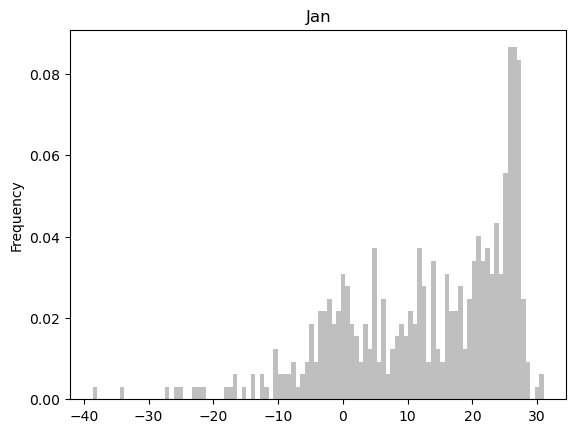

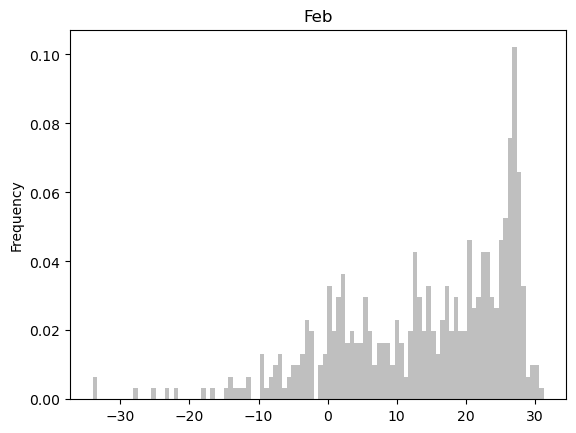

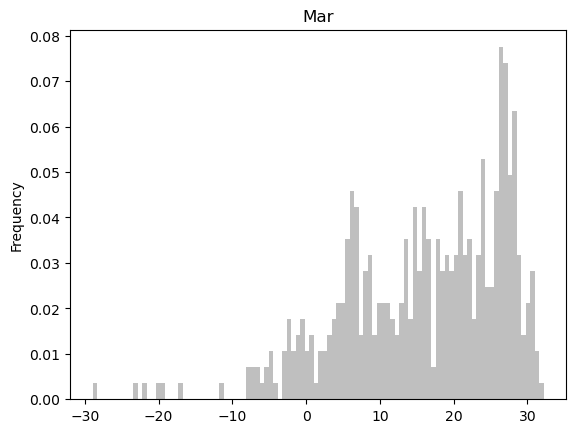

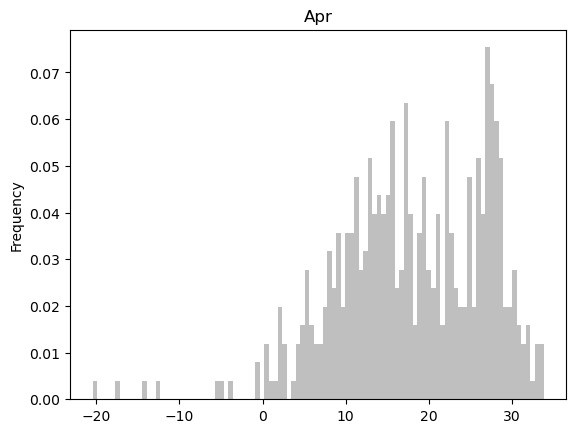

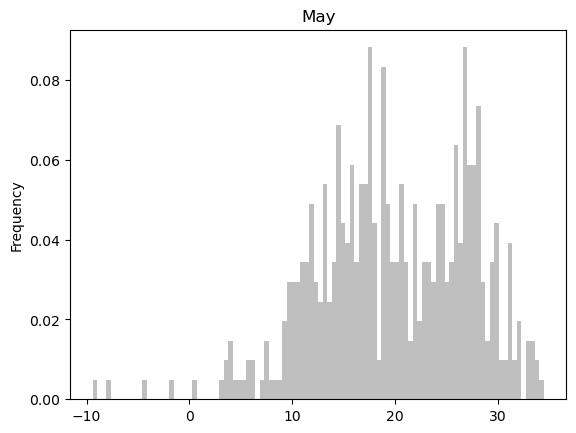

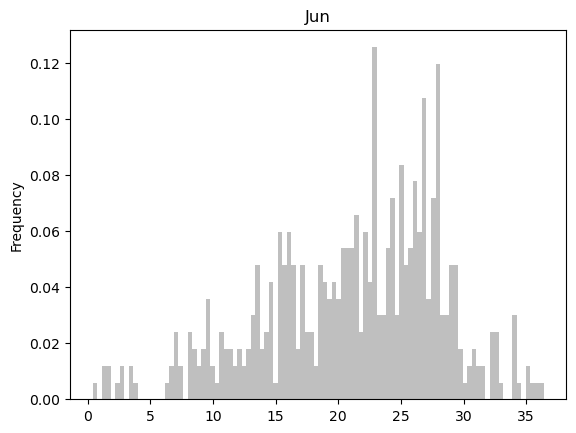

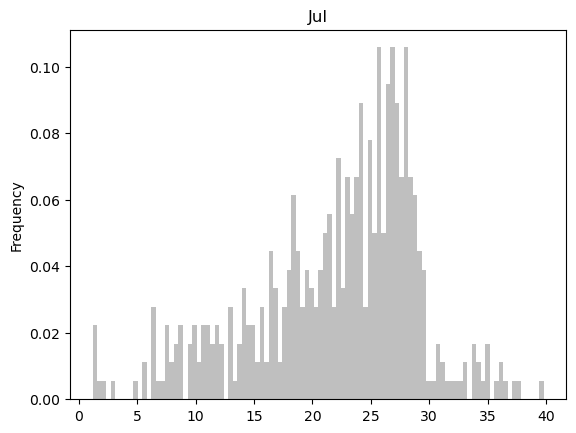

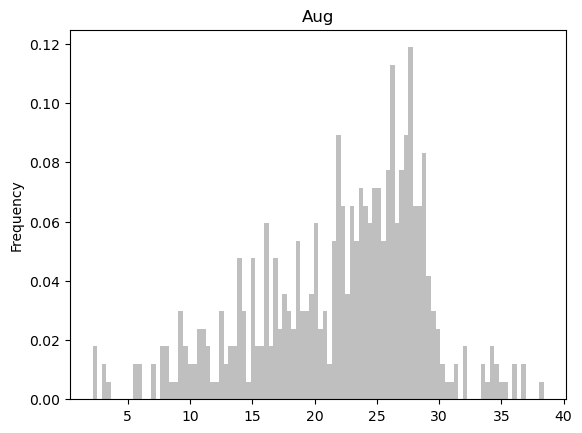

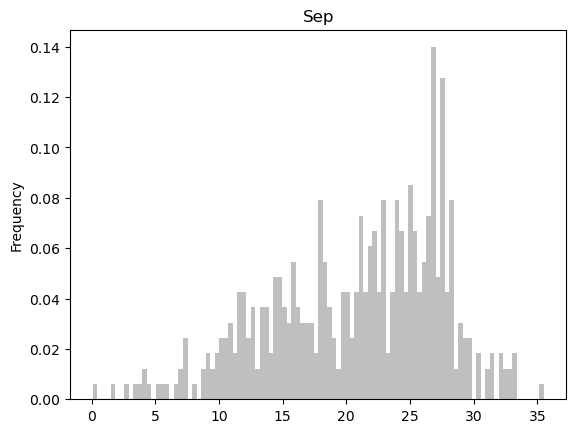

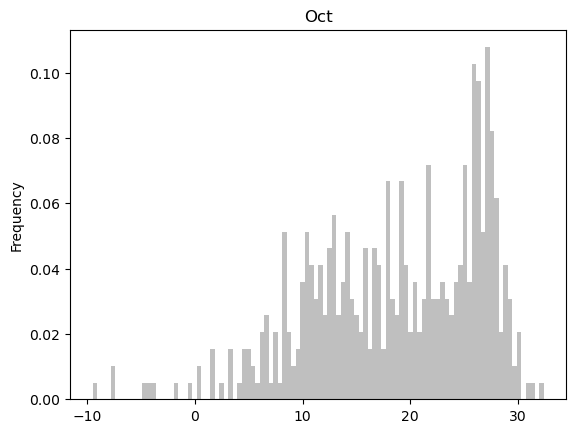

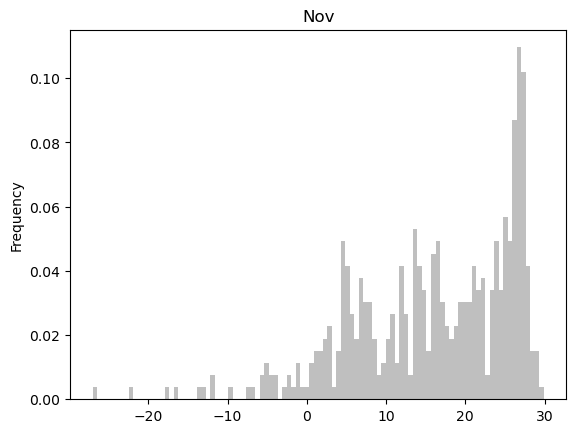

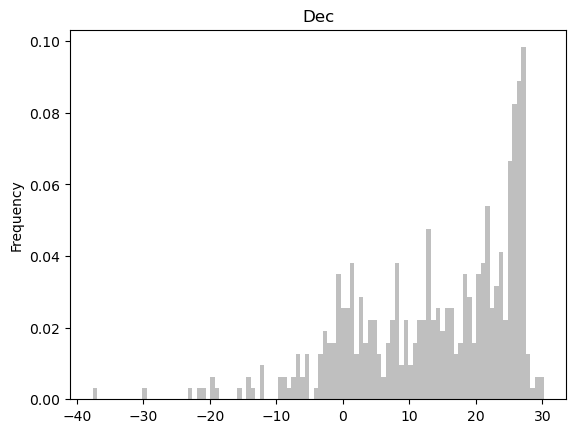

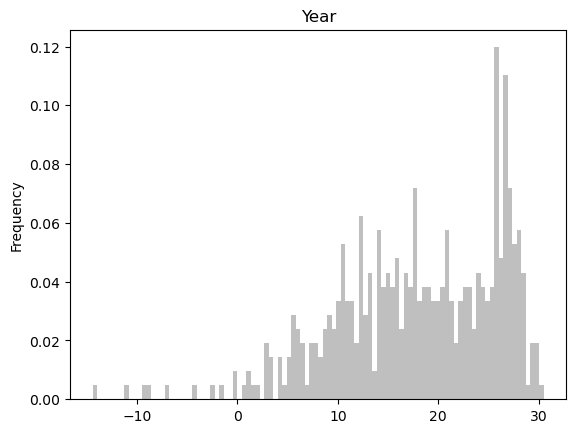

In [4]:
# строим гистограмму вычислений
# для наглядности установим значение bins=100
import matplotlib.pyplot as plt
for month in Months:
    plt.figure()
    plt.title(month)
    data[month].plot(kind='hist', density=1, bins=100, alpha=.5, color='grey')


&nbsp;&nbsp;&nbsp;&nbsp;**Строим ящик с усами для каждого месяца для визуализации выбросов.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Выводим информацию о выбросах (страна, город, температура)**

ВЫБРОСЫ
Выбросы в  Jan
Страна:  Russia Город:  Yakutsk Температура:  -38.6
Страна:  Canada Город:  Gjoa Haven Температура:  -33.8
Выбросы в  Feb
Страна:  Russia Город:  Yakutsk Температура:  -33.8
Страна:  Canada Город:  Gjoa Haven Температура:  -34.0
Страна:  Canada Город:  Iqaluit Температура:  -27.5
Выбросы в  Mar
Страна:  Russia Город:  Anadyr Температура:  -19.3
Страна:  Russia Город:  Dikson Температура:  -22.1
Страна:  Russia Город:  Yakutsk Температура:  -20.1
Страна:  Canada Город:  Gjoa Haven Температура:  -28.9
Страна:  Canada Город:  Iqaluit Температура:  -23.2
Выбросы в  Apr
Страна:  Russia Город:  Anadyr Температура:  -12.8
Страна:  Russia Город:  Dikson Температура:  -17.2
Страна:  Canada Город:  Gjoa Haven Температура:  -20.4
Страна:  Canada Город:  Iqaluit Температура:  -14.2
Выбросы в  May
Страна:  Russia Город:  Dikson Температура:  -7.8
Страна:  Canada Город:  Gjoa Haven Температура:  -9.4
Страна:  Canada Город:  Iqaluit Температура:  -4.4
Выбросы в  Jun
Страна:  Ru

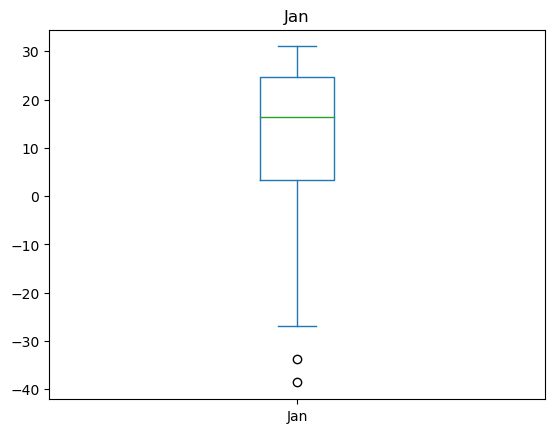

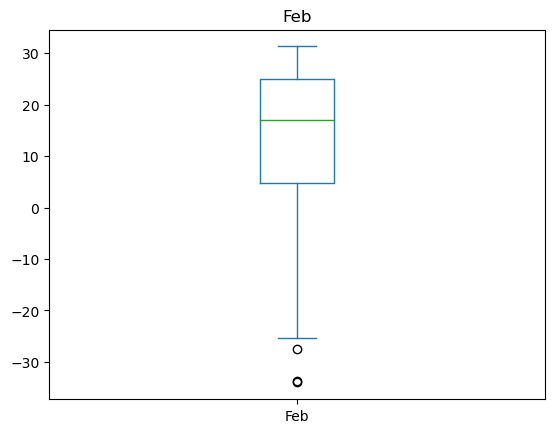

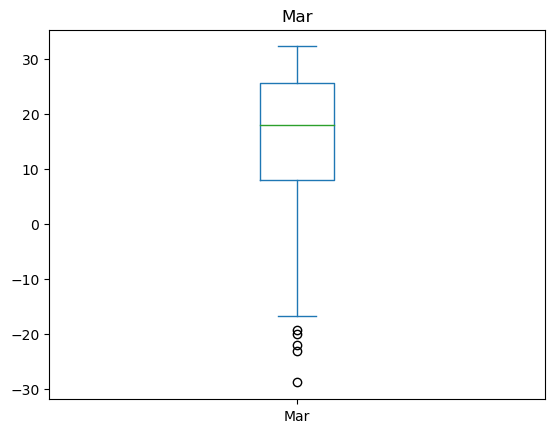

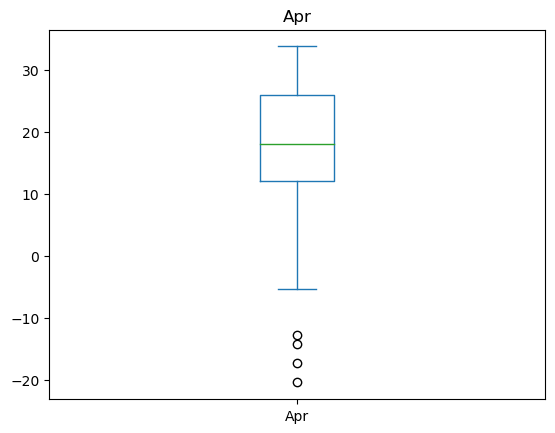

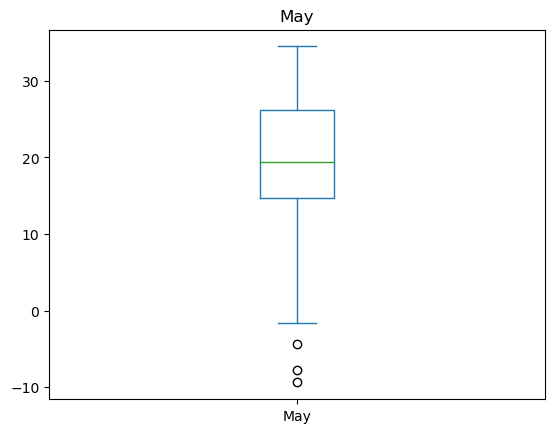

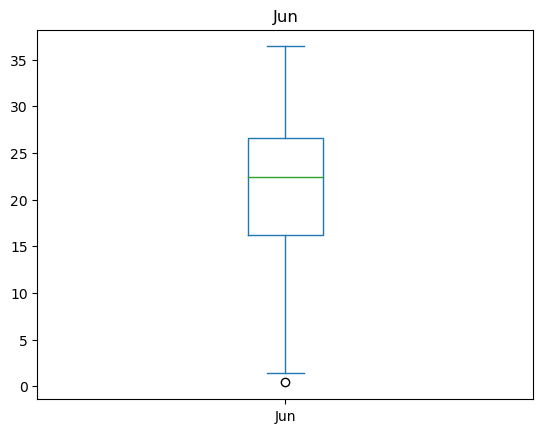

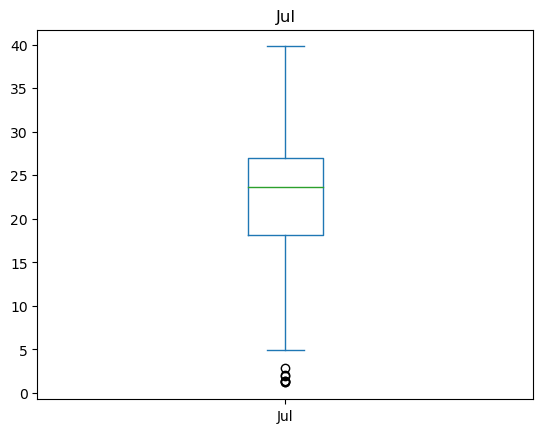

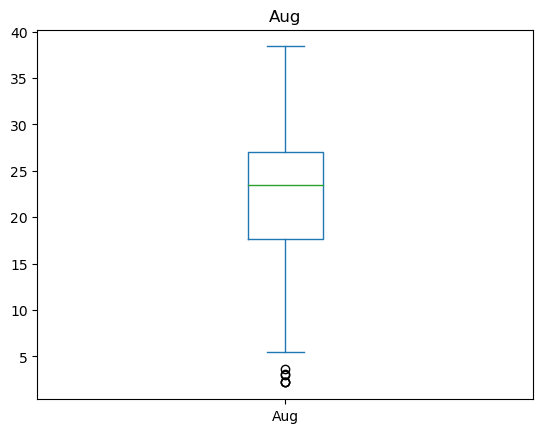

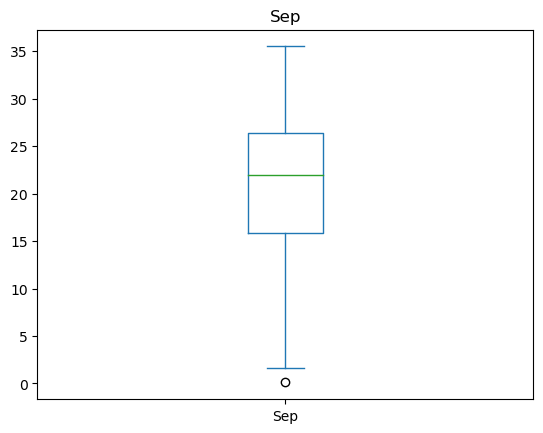

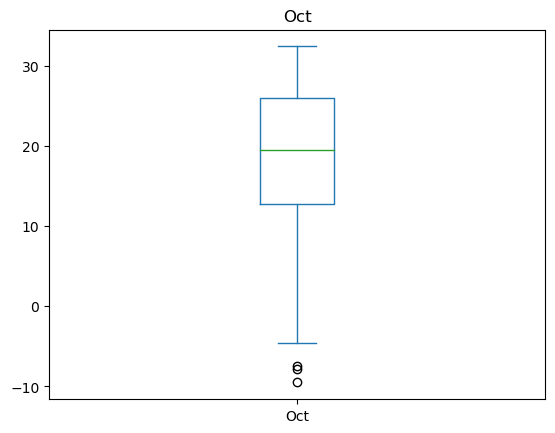

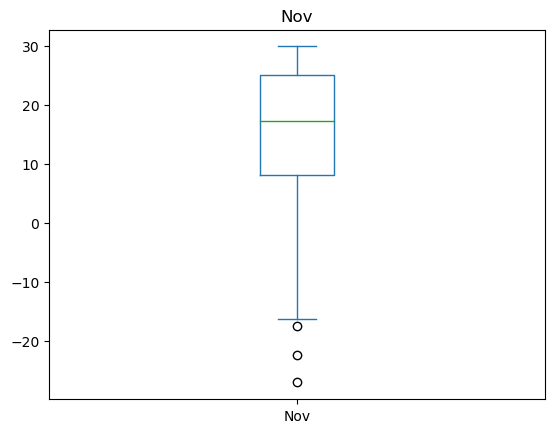

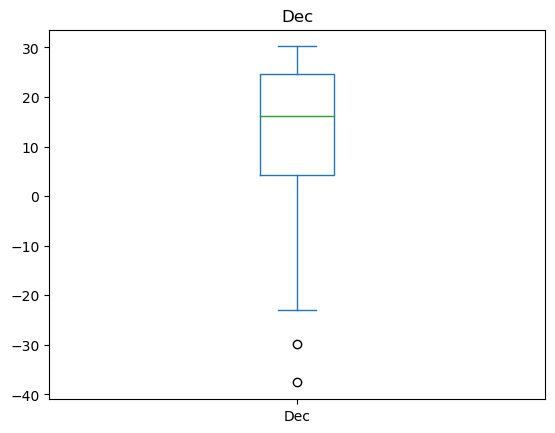

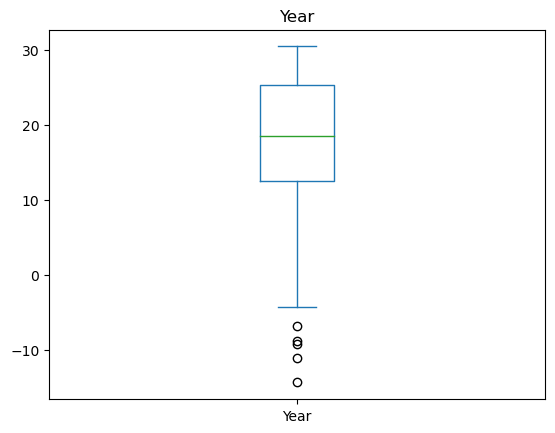

In [5]:
print("ВЫБРОСЫ")
for month in Months:
    plt.figure()
    plt.title(month)

    _, bp = data[month].plot.box(return_type='both')
    outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
    count = 0
    print("Выбросы в ", month)
    for elem in data[month]:  
        for i in outliers:
            if i == elem:
                print("Страна: ",data['Country'][count], "Город: ",data['City'][count], "Температура: ", i)
        count += 1
     

&nbsp;&nbsp;&nbsp;&nbsp;**3. Определяем есть ли пропущенные значения**

In [128]:
data.isna().sum()

Country    0
City       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
Year       0
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;Пропущенных значений не обнаружено.

&nbsp;&nbsp;&nbsp;&nbsp;**4. Вариант обработки пропущенных значений**

&nbsp;&nbsp;&nbsp;&nbsp;Пропущенных значений не обнаружено, однако, есди бы они были то для их обработки можно было бы использовать следующие варианты:
- Замена пропущенных значений средним или медианным значением атрибута.
- Интерполяция пропущенных значений на основе соседних значений.
- Удаление данных значений из выборки.

&nbsp;&nbsp;&nbsp;&nbsp;**5. Определяем корреляцию между параметрами**

&nbsp;&nbsp;&nbsp;&nbsp;**Найдём коффициенты корелляции температур месяцев и года:**

In [7]:
import seaborn as sns
# найдём коэффициенты корреляции
data_new = data
data_new = data_new.drop("Country", axis='columns')
data_new = data_new.drop("City", axis='columns')
data_new.corr()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Jan,1.000000,0.996057,0.973298,0.880219,0.660844,0.341804,0.149436,0.242138,0.584629,0.867016,0.972288,0.997167,0.891472
Feb,0.996057,1.000000,0.987552,0.909758,0.704855,0.393393,0.199541,0.288796,0.622930,0.888819,0.978646,0.994317,0.914453
Mar,0.973298,0.987552,1.000000,0.961259,0.798027,0.513258,0.322546,0.403750,0.710760,0.932299,0.983342,0.976789,0.956603
Apr,0.880219,0.909758,0.961259,1.000000,0.928796,0.714671,0.543607,0.606497,0.843960,0.967205,0.943665,0.895582,0.985929
May,0.660844,0.704855,0.798027,0.928796,1.000000,0.919169,0.803998,0.836674,0.947529,0.913491,0.788391,0.690152,0.921702
Jun,0.341804,0.393393,0.513258,0.714671,0.919169,1.000000,0.968419,0.968249,0.930164,0.731221,0.518510,0.381568,0.725739
Jul,0.149436,0.199541,0.322546,0.543607,0.803998,0.968419,1.000000,0.989166,0.870655,0.590830,0.343271,0.193219,0.573509
Aug,0.242138,0.288796,0.403750,0.606497,0.836674,0.968249,0.989166,1.000000,0.919845,0.669261,0.433874,0.286376,0.645666
Sep,0.584629,0.622930,0.710760,0.843960,0.947529,0.930164,0.870655,0.919845,1.000000,0.902635,0.741275,0.622746,0.880780
Oct,0.867016,0.888819,0.932299,0.967205,0.913491,0.731221,0.590830,0.669261,0.902635,1.000000,0.954375,0.891361,0.990574


&nbsp;&nbsp;&nbsp;&nbsp;**Построим матрицу графиков рассеивания:**

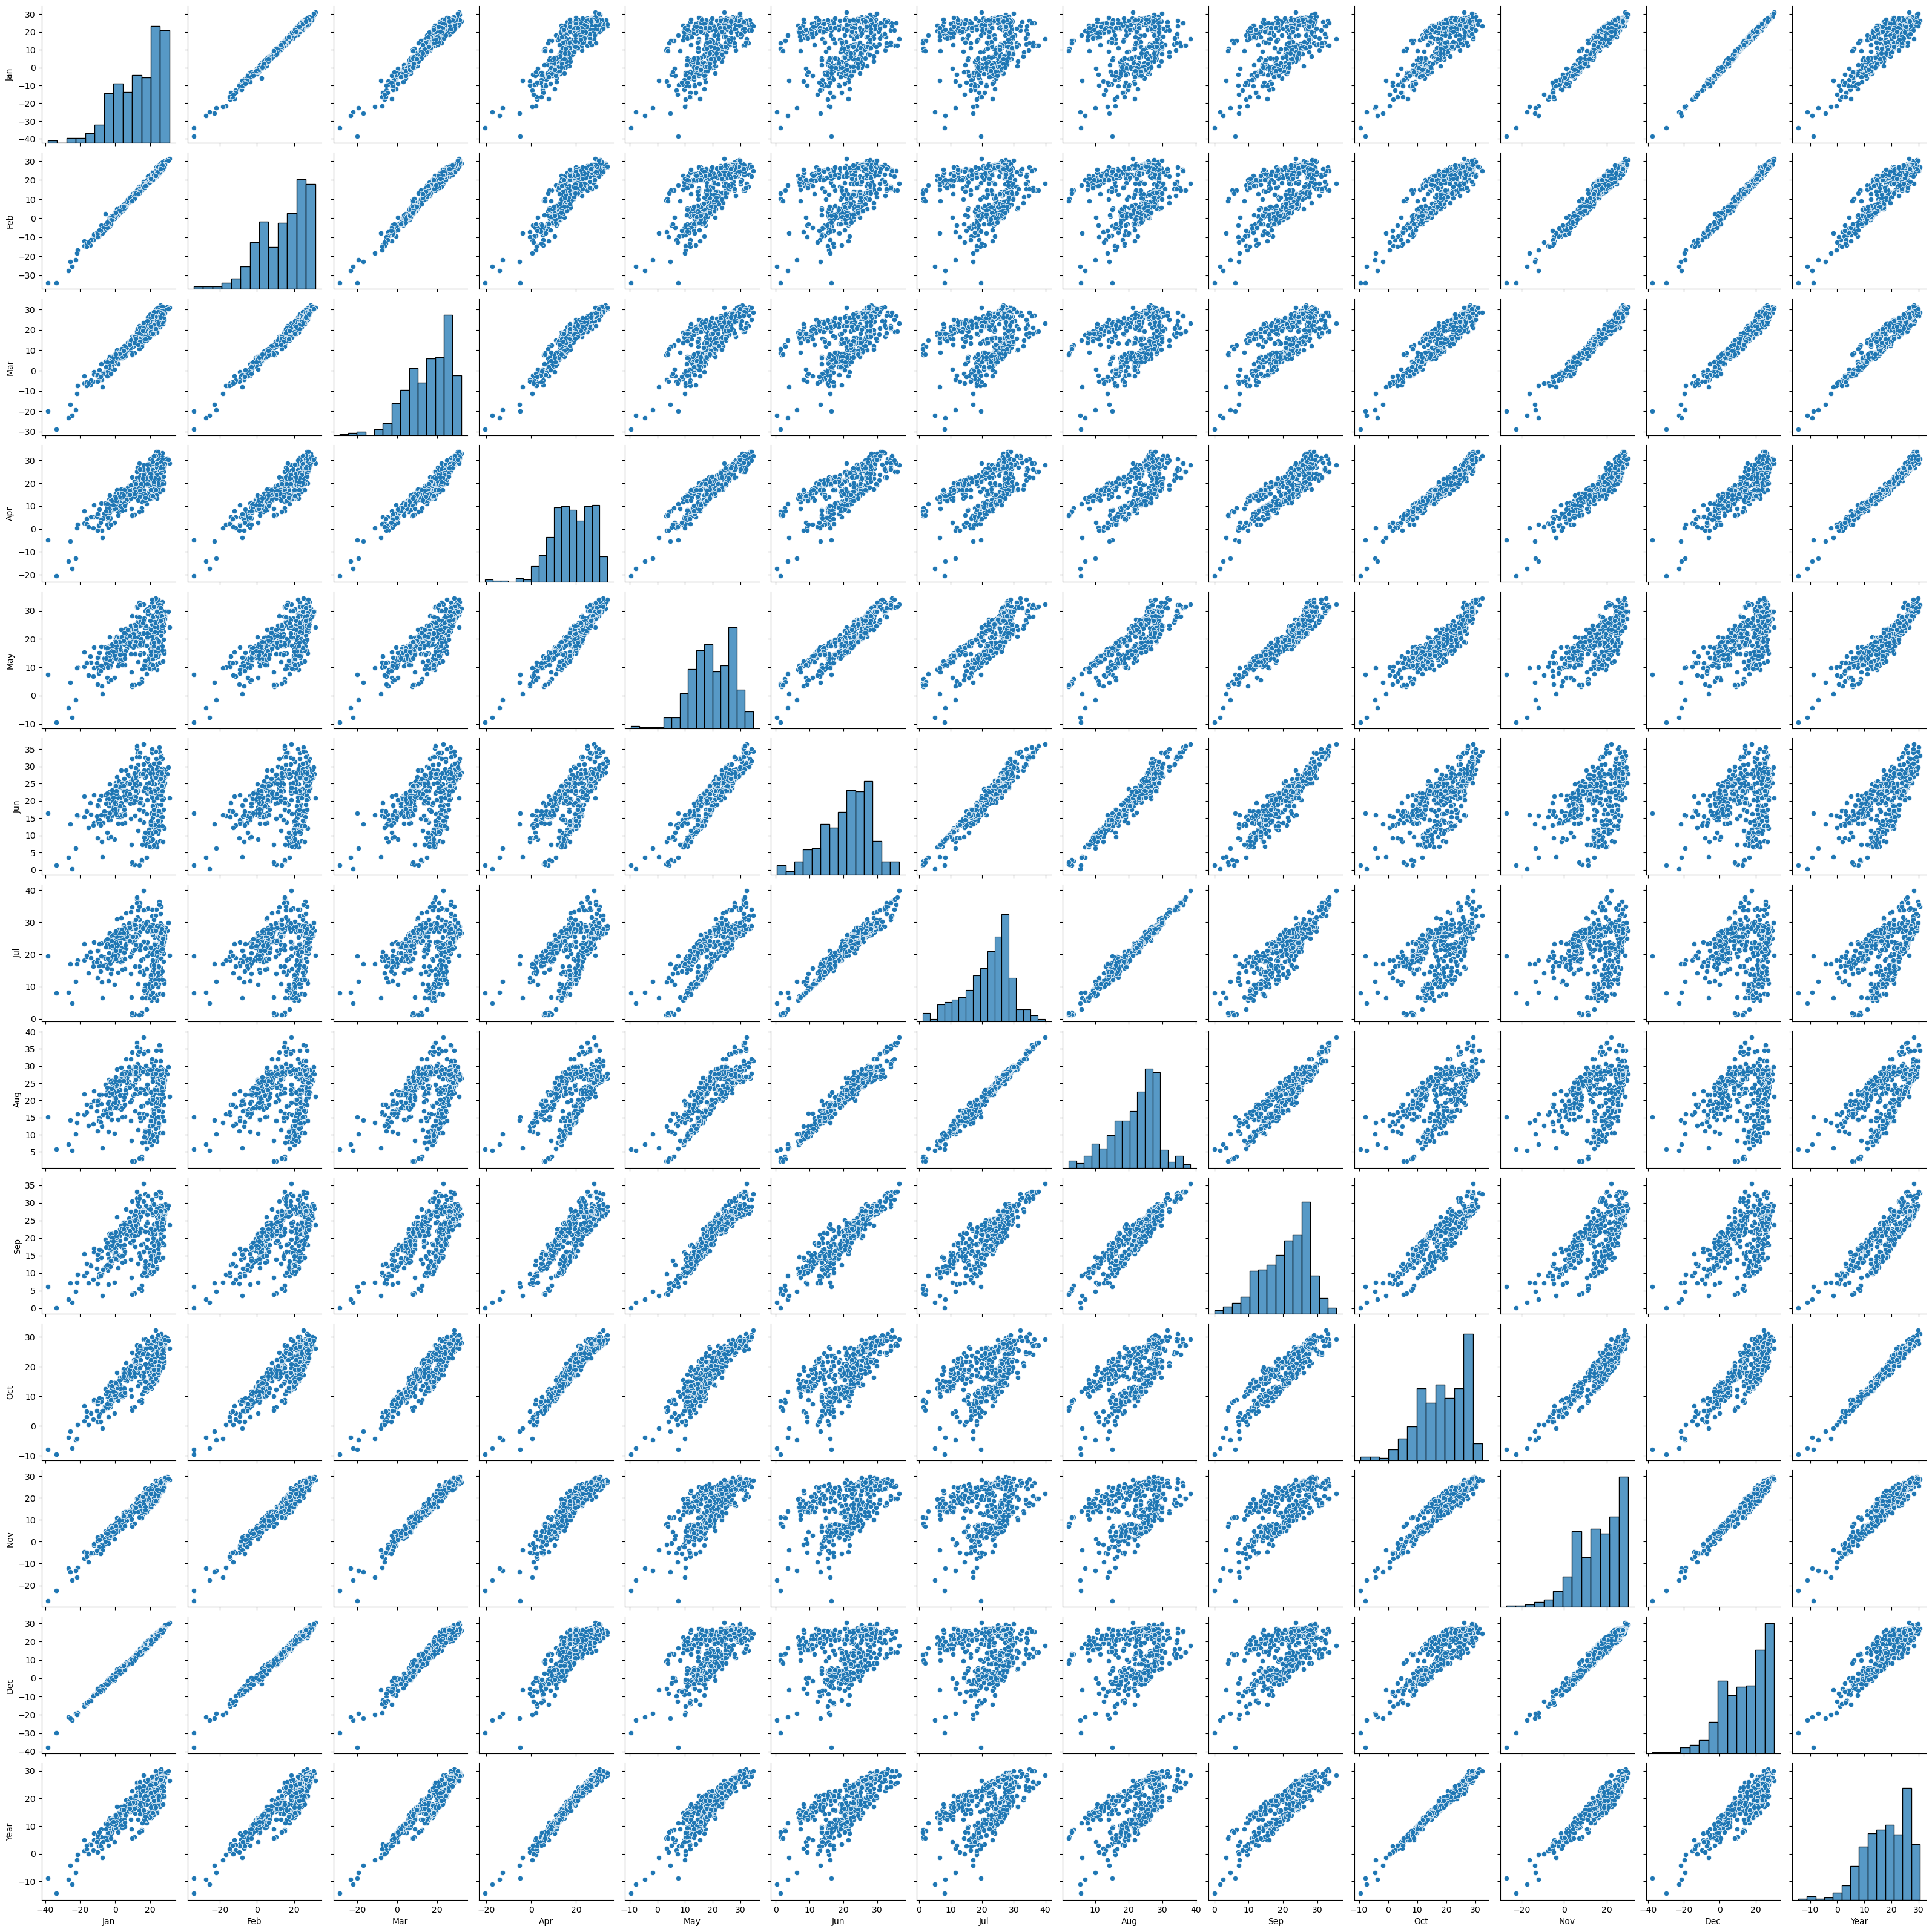

In [14]:
import warnings
# отключаем предупреждения
warnings.filterwarnings("ignore")

# строим матрицу графиков рассеивания
sns.pairplot(data_new)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;**6. Делаем выводы о корреляции между атрибутами, её характере**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Проведя визуальный анализ графиков рассеивания и получив данные о коэффициентах корреляции можно сделать вывод о том, что степень корреляции тем больше, чем ближе месяц к исследуемому. Таким образом январь имеет очень высокий коэффициент корреляции с такими месяцами как: февраль, март, апрель, ноябрь, октябрь и декабрь. В то время как май, июнь, июль, август и сентябрь имеют с январём гораздо меньший коэффициент корреляции. Аналогично для остальных месяцев.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Характер корреляции для всех месяцев положительный.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Самые высококоррелированные месяцы - январь и декабрь. Их коэффициент корреляции равен 0.997167. Самые низкокоррелированные - январь и июль, коэффициент корреляции которых равен 0.149436